Importy

In [1]:
import numpy as np
import pandas as pd
from CompressTree import CompressTree
from numpy.linalg import svd
from  timeit import default_timer as timer
from TreeDraw import draw_tree

In [2]:
def gen_mat_with_zeros(how_many_zeros: float, size = 2 **10) -> np.ndarray:
    X = np.random.random((size,size))
    P = np.random.random((size,size))
    return (P > how_many_zeros).astype(int) * X

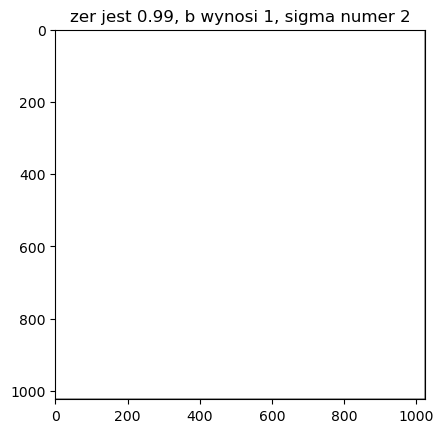

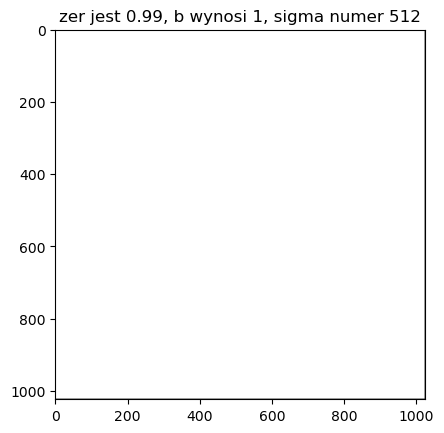

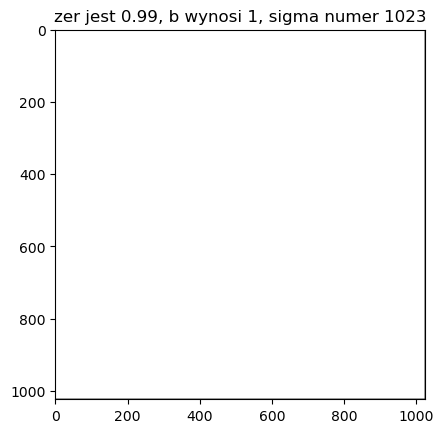

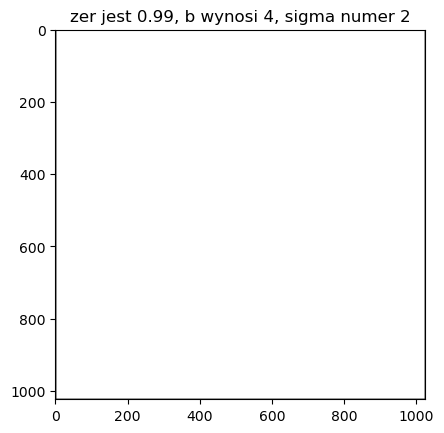

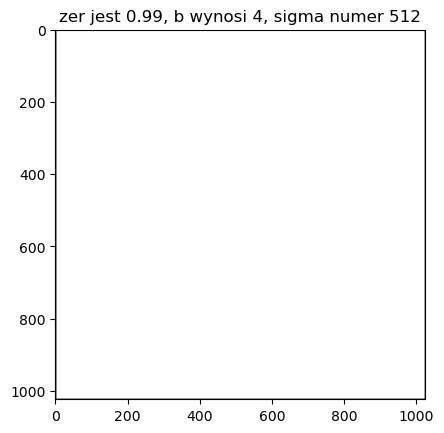

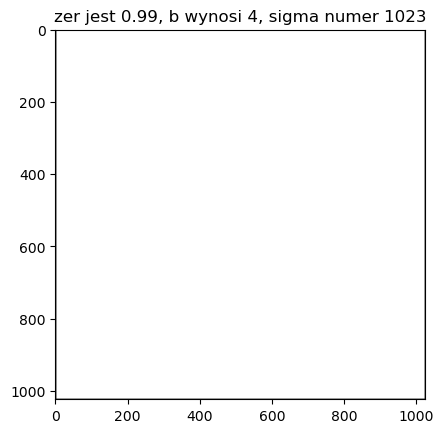

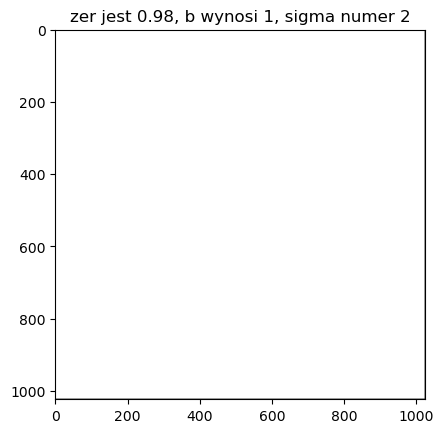

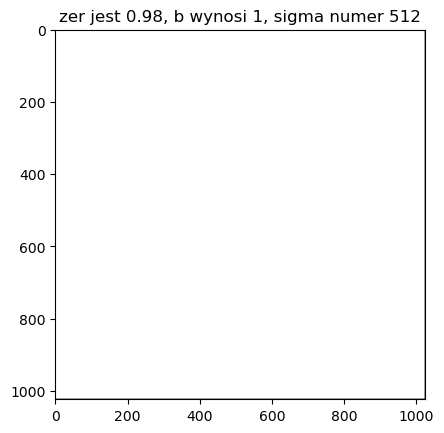

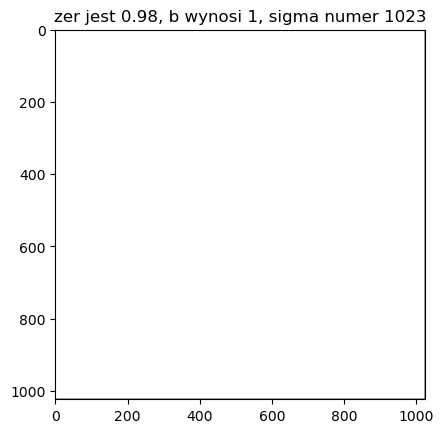

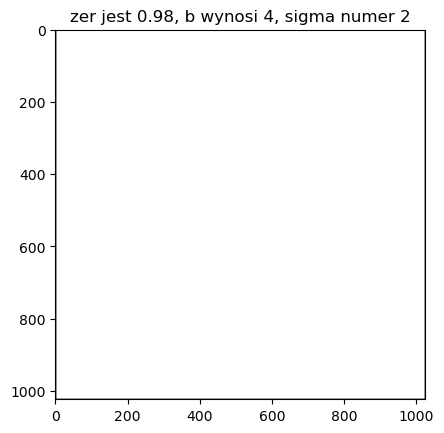

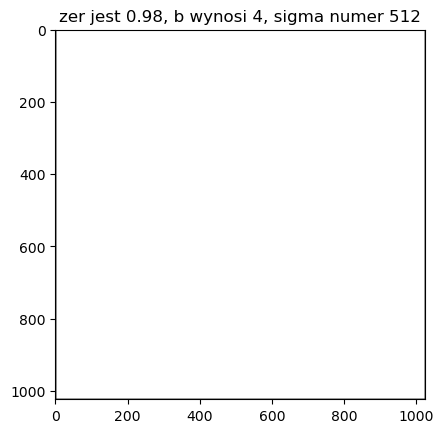

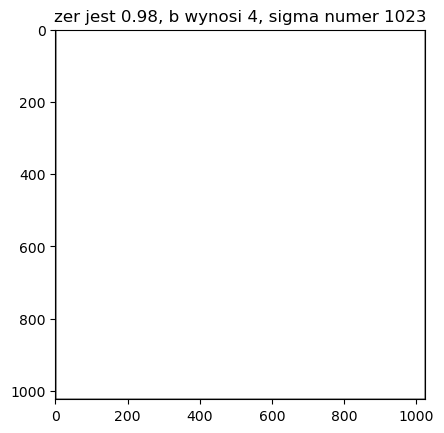

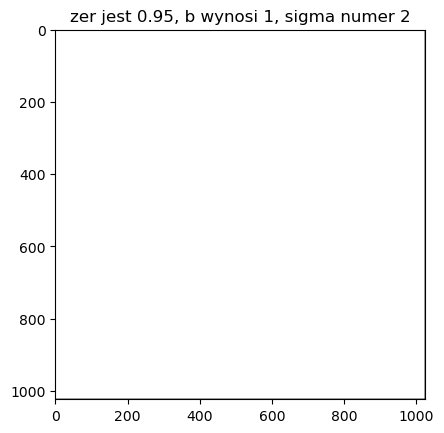

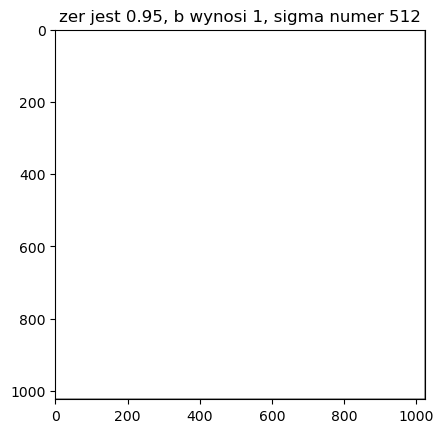

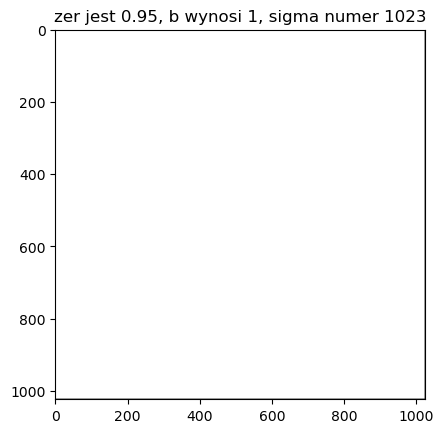

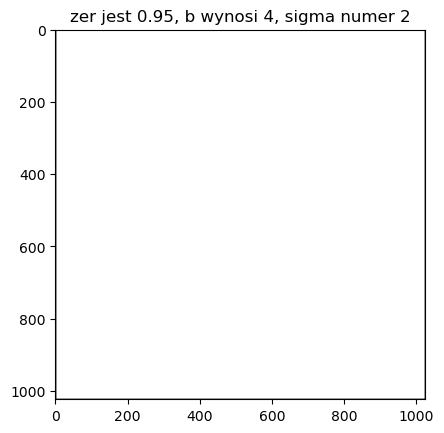

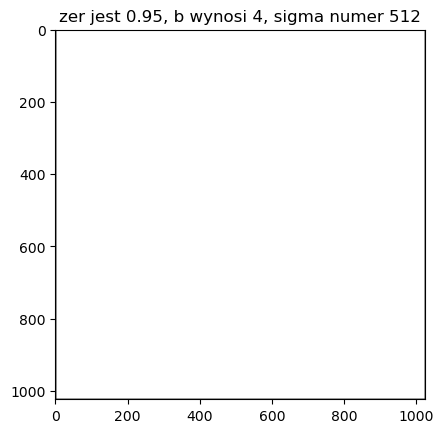

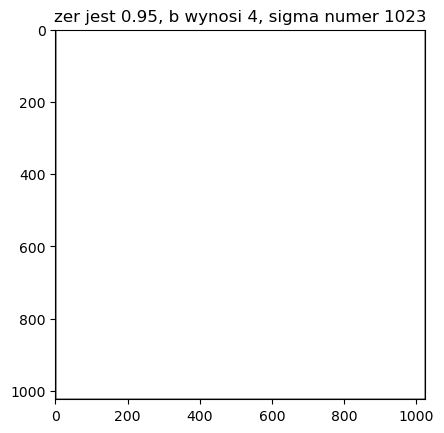

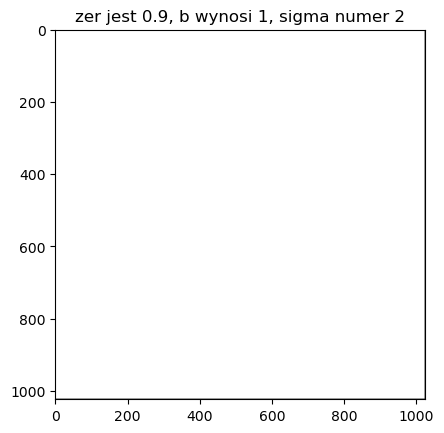

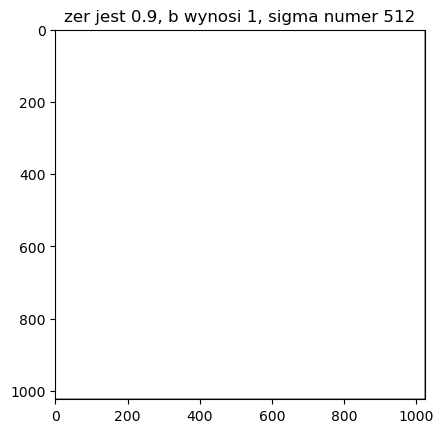

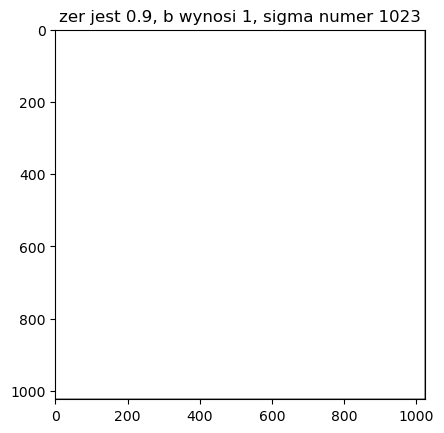

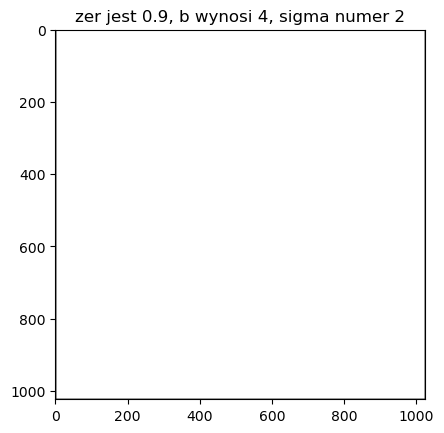

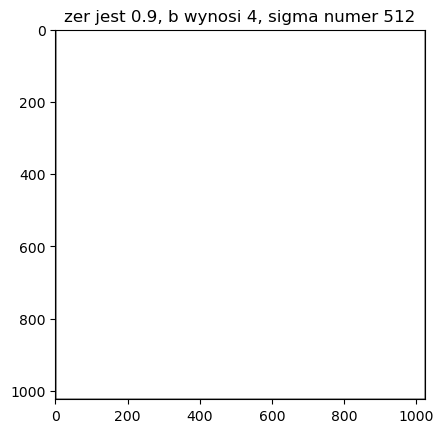

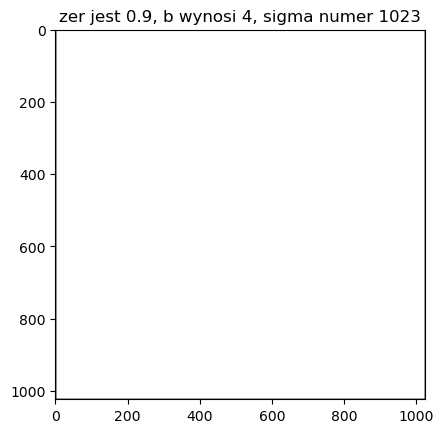

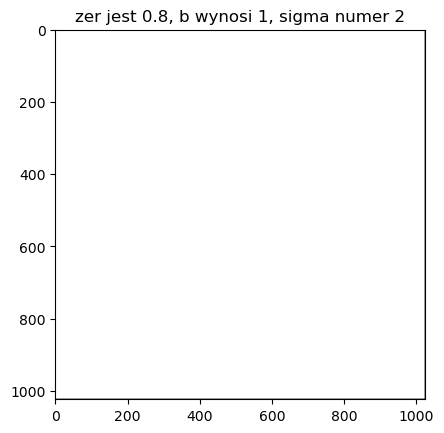

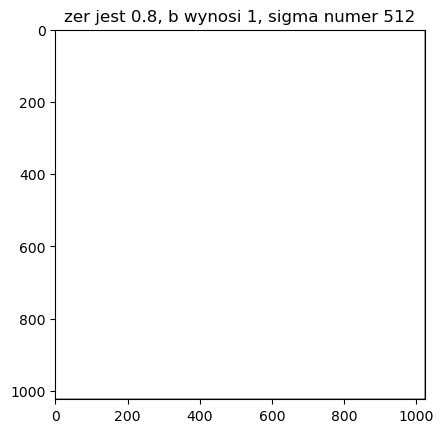

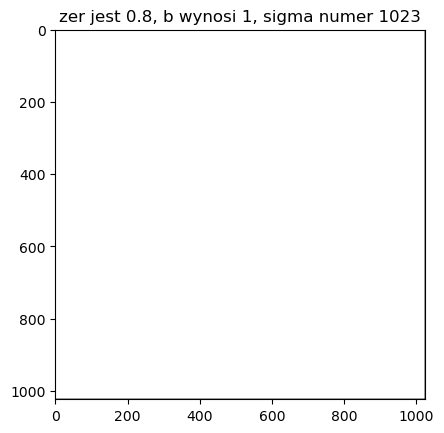

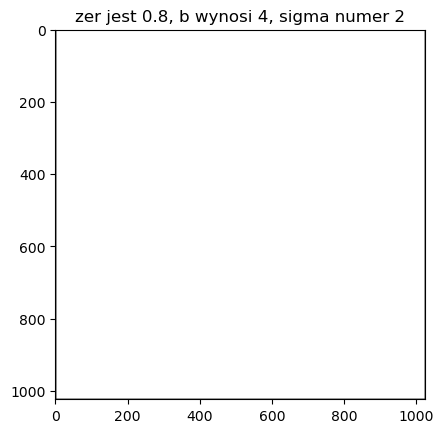

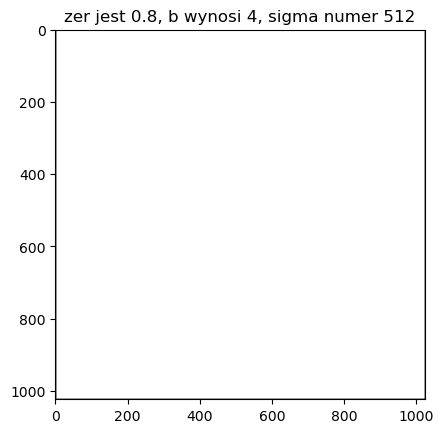

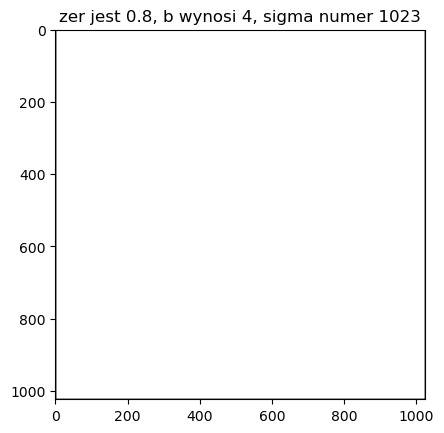

In [3]:
def measure_algorithms():
    results = []
    for p in [0.99,0.98, 0.95, 0.9, 0.8]:
        for b in [1, 4]:
            mat = gen_mat_with_zeros(p)
            root = CompressTree(mat, 0, len(mat), 0, len(mat[0]))
            U, Sigma, V = svd(mat)
            for s in [2,len(Sigma)//2, len(Sigma)-1]:
                start = timer()
                root.create_tree(b, Sigma[s])
                end = timer()
                draw_tree(root, f"zer jest {p}, b wynosi {b}, sigma numer {s}")
                decompressed = np.zeros((2**10, 2**10))
                root.decompress(decompressed)
                results.append([p, b, s, Sigma[s],root.compare(decompressed), end-start])
    df = pd.DataFrame(results, columns=["ile zer", "b", "która to sigma", "sigma","błąd", "czas wykonania"])
    return df
df = measure_algorithms()

In [4]:
df

,ile zer,b,która to sigma,sigma,błąd,czas wykonania
0,0.99,1,2,3.934358,3463.677499,0.031079
1,0.99,1,512,1.411523,3463.677499,1.087489
2,0.99,1,1023,0.000474,3463.677499,19.642238
3,0.99,4,2,3.909959,3373.609845,0.029064
4,0.99,4,512,1.405754,3373.609845,0.758054
5,0.99,4,1023,0.000527,3373.609845,6.454983
6,0.98,1,2,5.338242,6856.501369,0.023322
7,0.98,1,512,2.035181,6856.501369,0.795676
8,0.98,1,1023,0.000285,6856.501369,32.803821
9,0.98,4,2,5.363220,6821.210499,0.033153
